In [1]:
import rioxarray as rix
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar


In [2]:
def open_and_extract_date_from_filename(filepath):
    ds = rix.open_rasterio(filepath)
    ds.attrs['original_filename'] = os.path.basename(filepath)
    ds.attrs['date'] = os.path.basename(filepath)[:10]
    return ds

img_2020 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2020_psscene_analytic_sr_udm2/2020-05-02_strip_3365031_composite_file_format.tif")
img_2021 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2021_psscene_analytic_sr_udm2/2021-04-29_strip_4427235_composite_file_format.tif")
img_2022 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2022_psscene_analytic_sr_udm2/2022-05-06_strip_5620315_composite_file_format.tif")
img_2023 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-16_strip_6512704_composite_file_format.tif")
img_2024 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2024_psscene_analytic_sr_udm2/2024-05-02_strip_7279988_composite_file_format.tif")
img_2025 = open_and_extract_date_from_filename("/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2025_psscene_analytic_sr_udm2/2025-04-25_strip_8025643_composite_file_format.tif")

<Axes: >

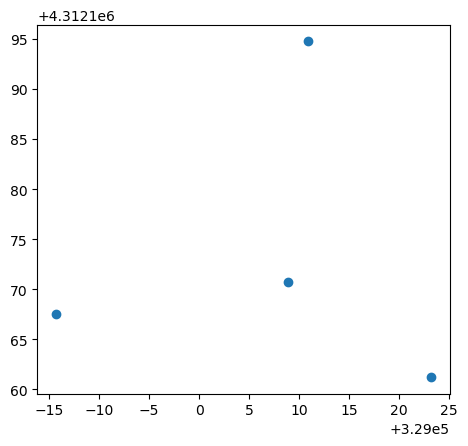

In [3]:
towers_gdf = gpd.read_file("./landsat_data/towers.geojson").to_crs(img_2020.rio.crs)
towers_gdf.plot()

In [4]:
central_point = towers_gdf.set_index('Tower').loc['c'].geometry
from shapely.geometry import box
x, y = central_point.x, central_point.y
bounding_box = gpd.GeoDataFrame(
    geometry = [box(x - 100, y - 100, x + 100, y + 100)],
)
bounding_box

,geometry
0,"POLYGON ((329108.911 4312070.778, 329108.911 4..."


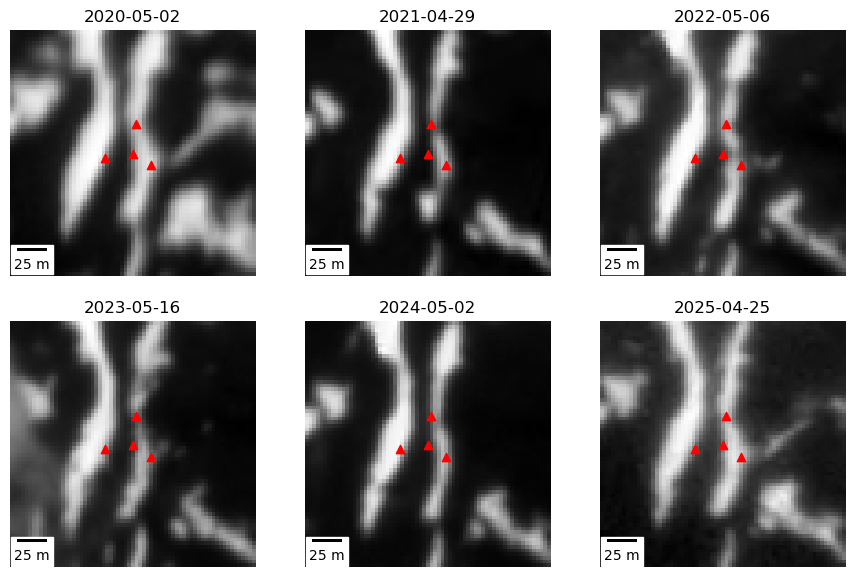

In [11]:
images = [ ('2020', img_2020), ('2021', img_2021), ('2022', img_2022), ('2023', img_2023), ('2024', img_2024), ('2025', img_2025), ]
# Crop all images
cropped_images = [(yr, img.rio.clip(bounding_box.geometry)) for yr, img in images]

# Plot the images in a 3x2 grid
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()

for ax, (yr, cropped_img) in zip(axes, cropped_images):
    cropped_img.sel(band=1).plot(ax=ax, cmap='grey', add_colorbar=False)
    ax.set_aspect('equal')
    ax.axis('off')  # Remove axis
    ax.set_title(cropped_img.attrs['date'])
    towers_gdf.plot(ax=ax, color='red', marker='^')
    scalebar = ScaleBar(1, location="lower left")
    ax.add_artist(scalebar)

plt.tight_layout()
plt.show()